> colors in R base

颜色可通过颜色小标、颜色名称、十六进制的颜色值、RGB值或HSV值来指定颜色。

col=1,col="white",col="#FFFFFF",col=rgb(1,1,1),col=hsv(0,0,1)均表示白色。

# 颜色基本函数

[1] "black"   "red"     "green3"  "blue"    "cyan"    "magenta" "yellow" 
[8] "gray"

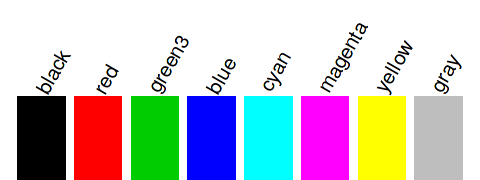

In [1]:
options(repr.plot.width=4, repr.plot.height=1.5)

palette() 
cols=palette()

par(mar=c(0,0,4,0))
posX=barplot(rep(1,8), col=cols, yaxt="n", border = NA)

text(posX, 1.05, labels=cols, 
     srt=60, adj=0,
     col="black", xpd=T)

## 查看颜色: scales包

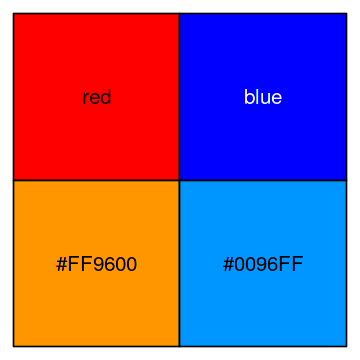

In [2]:
options(repr.plot.width=3, repr.plot.height=3)

scales::show_col( c('red','blue', '#FF9600', '#0096FF') )

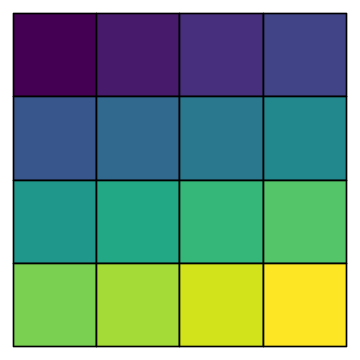

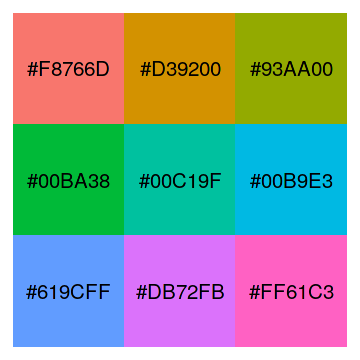

In [3]:
library(scales)
show_col(viridis_pal()(16), labels = FALSE)
show_col(hue_pal()(9), borders = NA) #效果见下图

## 带编号的颜色: 657种

[1] 657

[1] "white"         "aliceblue"     "antiquewhite"  "antiquewhite1"
 [5] "antiquewhite2" "antiquewhite3" "antiquewhite4" "aquamarine"   
 [9] "aquamarine1"   "aquamarine2"

[1] 657

[1] 675

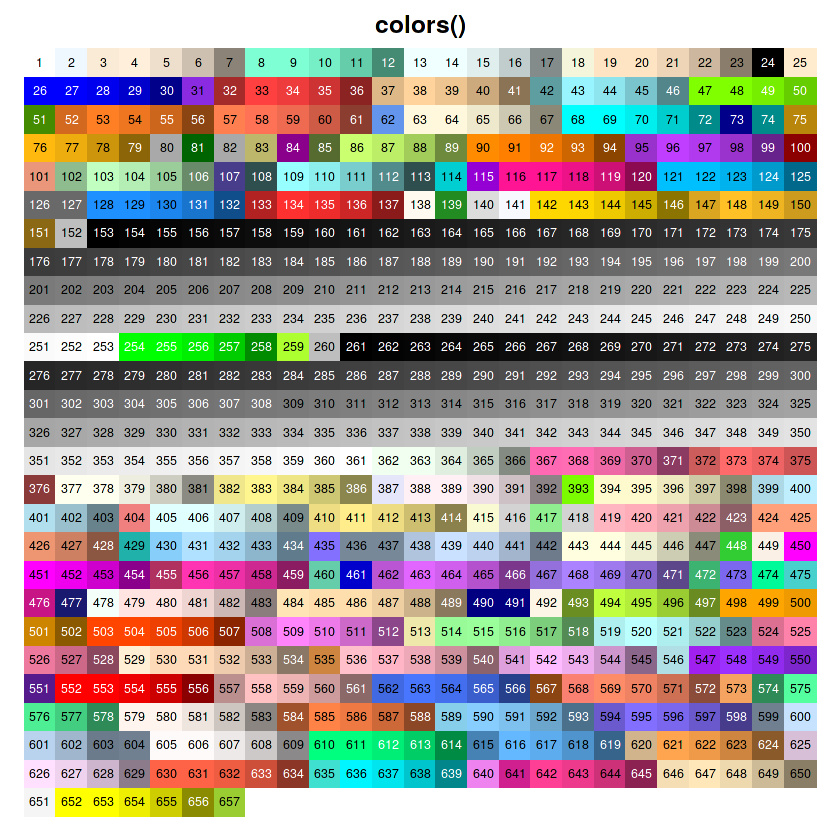

In [4]:
options(repr.plot.width=7, repr.plot.height=7)

# total
length(colors()) #657个
colors()[1:10]

# step1: all colors
cols=colors()
length(cols)
for(i in 1:(25*27-657) ){
    cols=c(cols, "white")
}
length(cols)

# step2: plot
par(mar=c(1,1,2,1))
dat= matrix( 1:(25*27) , ncol=25, byrow = T)
z=t(dat)
z=z[, seq(ncol(z),1,-1) ]
image(x=1:nrow(z), y=1:ncol(z), z=z, 
      axes = FALSE, ann=F,
      col= cols)
title(main="colors()")

# add number
for (x in 1:nrow(z)) {
  for (y in 1:ncol(z))  {
    if( z[x, y] <= 657){
       # 检测背景色，平均RGB超过150认为浅色，否则深色。
       light=sum( unname( col2rgb( colors()[z[x, y]])[,1] ) )/3 > 120
       text(x, y, z[x, y], cex=0.6, col=ifelse(light, "black",'white'))
    }
  }
}

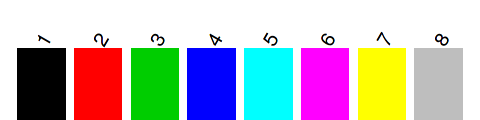

In [5]:
options(repr.plot.width=4, repr.plot.height=1)

par(mar=c(0,0,2,0))
posX=barplot(rep(1,8), col=1:8, ann=F, axes=F, border = NA)

text(posX, 1.05, labels=1:8, 
     srt=60, adj=0,
     col="black", xpd=T)

## 颜色格式转换

### 颜色名 to RGB

In [6]:
col2rgb("forestgreen")

col2rgb( c("slateblue", 'red', 'blue','purple') )

red,34
green,139
blue,34


red,106,255,0,160
green,90,0,0,32
blue,205,0,255,240


### RGB to 16进制颜色

In [7]:
# 默认是输入0-1之间的rgb
rgb(1,0,0)

[1] "#FF0000"

In [8]:
# 也可以指定输入值的max值
rgb(100,0,0, maxColorValue = 255)

[1] "#640000"

## 颜色不透明度 alpha

16进制颜色的7-8位就是不透明度。
- 越小越透明，越能看到下一层图片。
- 越大越不透明，最终只显示自己，完全不显示下一层。

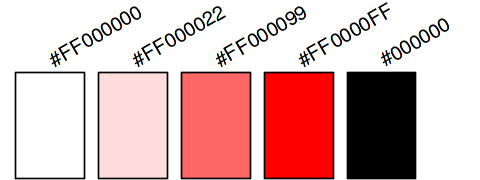

In [9]:
options(repr.plot.width=4, repr.plot.height=1.5)

par(mar=c(0,0,3,2))
colors=c("#FF000000","#FF000022","#FF000099","#FF0000FF", '#000000')
posX=barplot( rep(1,5), col=colors, ann=F, axes=F )
text(posX, 1.1, labels=colors, xpd=T, srt=30, adj=0)

[1] "#FF000033"

[1] "#FF0000CC"

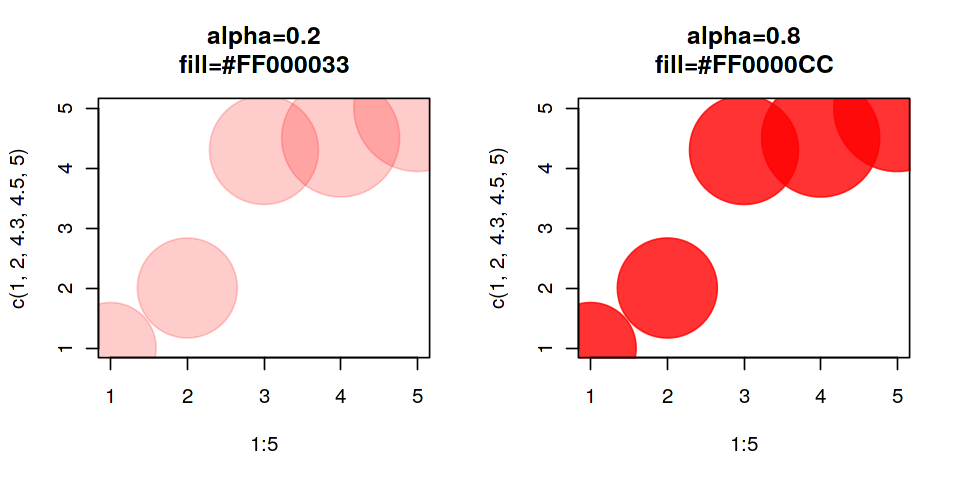

In [10]:
options(repr.plot.width=8, repr.plot.height=4)

color1=rgb(1,0,0, alpha=0.2); color1
color2=rgb(1,0,0, alpha=0.8); color2

par(mfrow=c(1,2))
plot(1:5, c(1,2,4.3,4.5,5), col=color1, pch=19, cex=10:25, main= paste0("alpha=0.2\nfill=", color1) )
plot(1:5, c(1,2,4.3,4.5,5), col=color2, pch=19, cex=10:25, main= paste0("alpha=0.8\nfill=", color2) )

# 渐变色

## 内置渐变色

- rainbow(n) - Red->green->blue->Violet
- heat.colors(n) - Red->Orange->White
- terrain.colors(n) - Green->Brown->White
- topo.colors(n) - Blue->Green->Brown->White
- grey(n) - Black->White

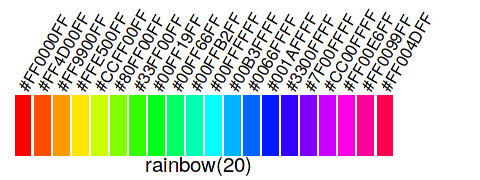

In [11]:
options(repr.plot.width=4, repr.plot.height=1.5)

n=20
cols=rainbow(n)


par(mar=c(1,0,4,3))
posX=barplot(rep(1,n), col=cols, yaxt="n", border = NA)
text( max(posX)/2, -0.18, "rainbow(20)", xpd=T )

text(posX, 1.1, labels=cols, 
     srt=60, adj=0, cex=0.8,
     col="black", xpd=T)

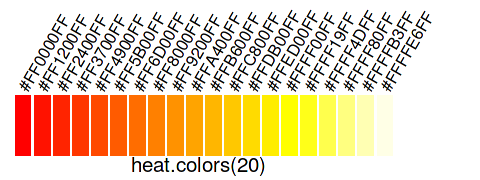

In [12]:
options(repr.plot.width=4, repr.plot.height=1.5)

n=20
cols=heat.colors(n)

par(mar=c(1,0,4,3))
posX=barplot(rep(1,n), col=cols, yaxt="n", border = NA)
text( max(posX)/2, -0.18, "heat.colors(20)", xpd=T )

text(posX, 1.1, labels=cols, 
     srt=60, adj=0, cex=0.8,
     col="black", xpd=T)

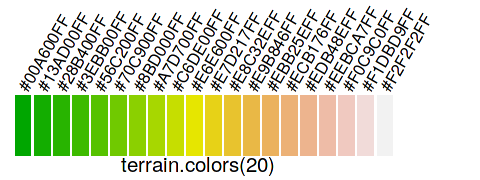

In [13]:
options(repr.plot.width=4, repr.plot.height=1.5)

n=20
cols=terrain.colors(n)

par(mar=c(1,0,4,3))
posX=barplot(rep(1,n), col=cols, yaxt="n", border = NA)
text( max(posX)/2, -0.18, "terrain.colors(20)", xpd=T )

text(posX, 1.1, labels=cols, 
     srt=60, adj=0, cex=0.8,
     col="black", xpd=T)

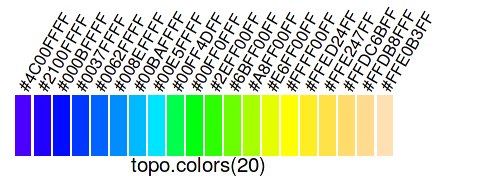

In [14]:
options(repr.plot.width=4, repr.plot.height=1.5)

n=20
cols=topo.colors(n)

par(mar=c(1,0,4,3))
posX=barplot(rep(1,n), col=cols, yaxt="n", border = NA)
text( max(posX)/2, -0.18, "topo.colors(20)", xpd=T )

text(posX, 1.1, labels=cols, 
     srt=60, adj=0, cex=0.8,
     col="black", xpd=T)

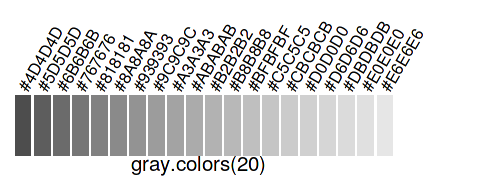

In [15]:
options(repr.plot.width=4, repr.plot.height=1.5)

n=20
cols=gray.colors(n)

par(mar=c(1,0,4,3))
posX=barplot(rep(1,n), col=cols, yaxt="n", border = NA)
text( max(posX)/2, -0.18, "gray.colors(20)", xpd=T )

text(posX, 1.1, labels=cols, 
     srt=60, adj=0, cex=0.8,
     col="black", xpd=T)

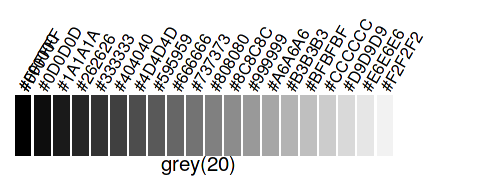

In [16]:
options(repr.plot.width=4, repr.plot.height=1.5)

n=20
cols=grey( (0:n)/n)

par(mar=c(1,0,4,3))
posX=barplot(rep(1,n), col=cols, yaxt="n", border = NA)
text( max(posX)/2, -0.18, "grey(20)", xpd=T )

text(posX, 1.1, labels=cols, 
     srt=60, adj=0, cex=0.8,
     col="black", xpd=T)

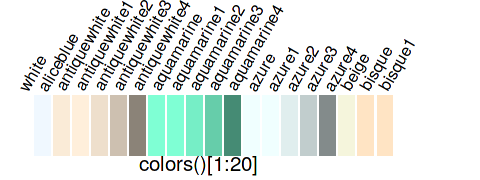

In [17]:
options(repr.plot.width=4, repr.plot.height=1.5)

n=20
cols=colors()[1:n]

par(mar=c(1,0,4,3))
posX=barplot(rep(1,n), col=cols, yaxt="n", border = NA)
text( max(posX)/2, -0.18, "colors()[1:20]", xpd=T )

text(posX, 1.1, labels=cols, 
     srt=60, adj=0, cex=0.8,
     col="black", xpd=T)

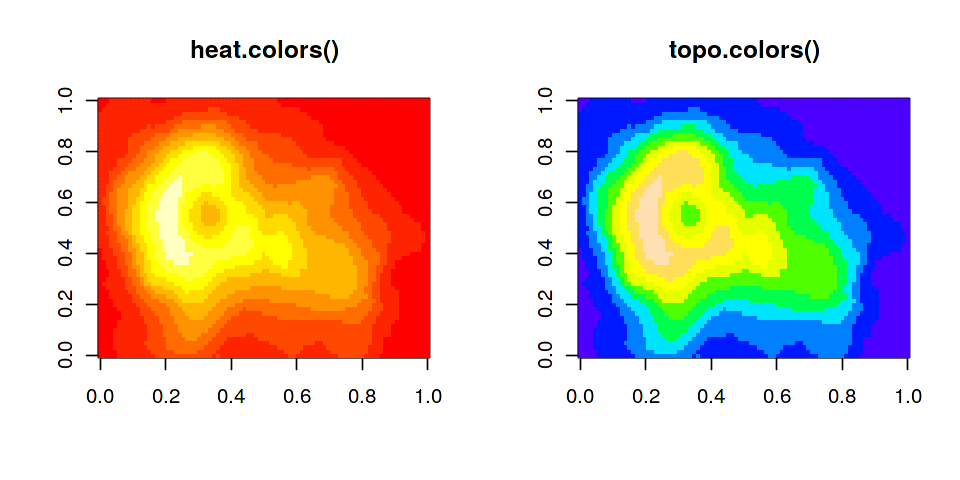

In [18]:
options(repr.plot.width=8, repr.plot.height=4)

par(mfrow = c(1, 2))
image(volcano, col = heat.colors(10), main = "heat.colors()")
image(volcano, col = topo.colors(10), main = "topo.colors()")

## 自定义渐变色 

[1] "#FFFF00" "#FFE400" "#FFC900" "#FFAE00" "#FF9300" "#FF7800" "#FF5D00"
 [8] "#FF4300" "#FF2800" "#FF0D00" "#F10000" "#D60000" "#BB0000" "#A10000"
[15] "#860000" "#6B0000" "#500000" "#350000" "#1A0000" "#000000"

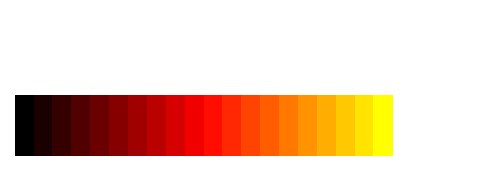

In [19]:
options(repr.plot.width=4, repr.plot.height=1.5)
par(mar=c(1,0,4,3))

ramp <- colorRamp(c('yellow',"red", "black"))

n=20
cols=rgb( ramp(seq(0, 1, length = n)), max = 255)
cols

barplot(rep(1,n), col=rev(cols), ann=F, axes=F, 
        border=NA, space =0) #不要border，间距为0

## RColorBrewer 包

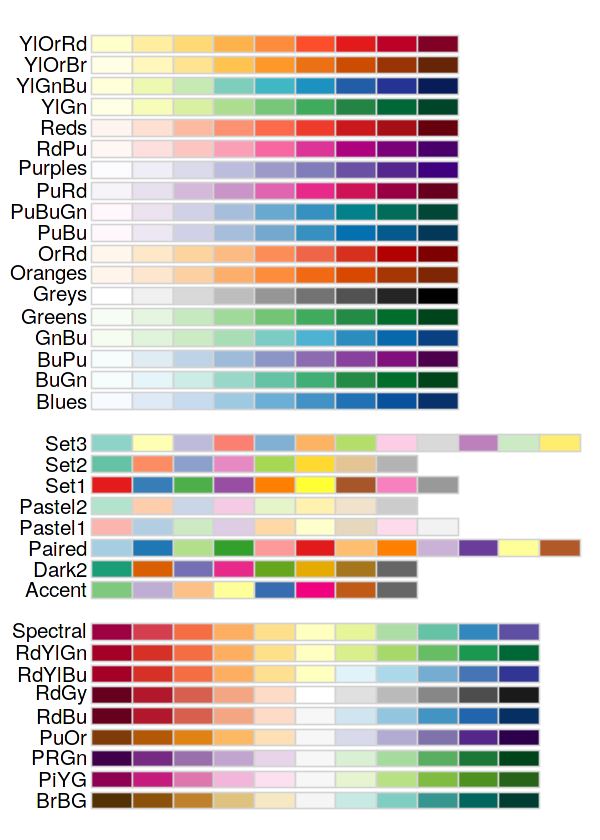

In [20]:
options(repr.plot.width=5, repr.plot.height=7)

par(mar=c(0,3,0,0))

library(RColorBrewer)
display.brewer.all() #显示全部颜色集合

### 使用色板: brewer.pal(n, name)

In [21]:
### 
library(RColorBrewer)

brewer.pal(8,'Set2')

[1] "#66C2A5" "#FC8D62" "#8DA0CB" "#E78AC3" "#A6D854" "#FFD92F" "#E5C494"
[8] "#B3B3B3"

[1] "#66C2A5" "#FC8D62" "#8DA0CB" "#E78AC3" "#A6D854" "#FFD92F" "#E5C494"
[8] "#B3B3B3"

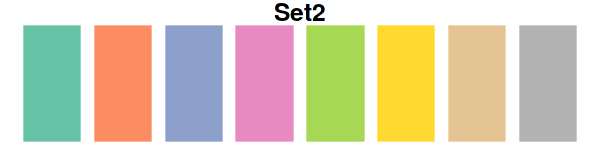

In [22]:
options(repr.plot.width=5, repr.plot.height=1.2)
par( mar=c(0,0,1,0)) #bottom, left, top, right

## 选一个颜色集合，比如Dark2, Set2
cols=brewer.pal(8,'Set2'); cols
barplot(rep(1,8),col= cols, main="Set2", axes=F,border=F)

## colorRamp()

colorRamp()接收几个颜色，返回一个函数。
- 该函数接收参数0-1之间，返回rgb形式的渐变色

In [23]:
# step1 接收几个颜色，返回函数 的输入是0-1之间的小数
pal <- colorRamp(c("red", "white", "blue"))
pal
pal(0)
pal(0.5)
pal(1)

function (x) 
roundcolor(cbind(palette[[1L]](x), palette[[2L]](x), palette[[3L]](x), 
    if (alpha) palette[[4L]](x))) * 255
<bytecode: 0x55918cc8d7a8>
<environment: 0x559191672088>

255,0,0


255,255,255


0,0,255


255,0.00000,0.00000
255,26.84211,26.84211


[1] "#FF0000" "#FF1A1A" "#FF3535" "#FF5050" "#FF6B6B"

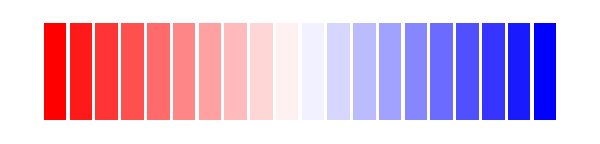

In [24]:
options(repr.plot.width=5, repr.plot.height=1.2)
par(mar=c(1,1,1,1))

# step2 产生10个颜色
n=20
colsRGB=pal(seq(0, 1, len = n))
head(colsRGB, n=2)

# step3 换算成16进制颜色
cols=rgb(colsRGB, maxColorValue =255 )
head(cols, n=5)
# step4 plot
barplot(rep(1,n), col=cols, ann=F, axes=F, border = NA)

## 颜色插值: colorRampPalette()

```
colorRamp(colors, bias = 1, space = c("rgb", "Lab"),  
          interpolate = c("linear", "spline"), alpha = FALSE)
colorRampPalette(colors, ...)
```

[1] "#FF0000" "#FF1A1A" "#FF3535" "#FF5050" "#FF6B6B" "#FF8686"

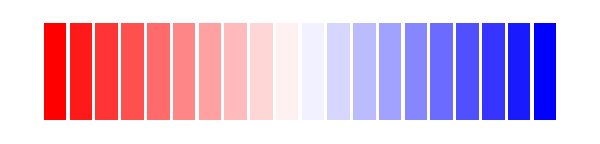

In [25]:
## 返回值也是函数。该函数输入整数，返回整数个颜色值 16进制
pal=colorRampPalette( c('red','white','blue'))
n=20
cols=pal(n)
head(cols)


options(repr.plot.width=5, repr.plot.height=1.2)
par(mar=c(1,1,1,1))

barplot(rep(1,n), col=cols, ann=F, axes=F, border = NA)

### interpolate="linear" 颜色插值类型

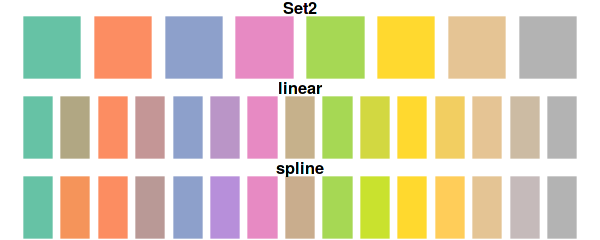

In [26]:
options(repr.plot.width=5, repr.plot.height=2)

## 选一个颜色集合，比如Dark2, Set2
csn='Set2'
myColors=brewer.pal(8,csn) #该主题有n种颜色

par( mfrow=c(3,1), mar=c(0,0,1,0)) #bottom, left, top, right

barplot(rep(1,8),col= myColors, main=csn, axes=F,border=F)
#
# 插值，生成15个颜色
n=15
colorN=colorRampPalette(colors = myColors, interpolate ="linear")( n )
barplot(rep(1, n ),col= colorN, axes=F, border=F,
        main="linear") #插值方式
#
colorN2=colorRampPalette(colors = myColors, interpolate ="spline")( n )
barplot(rep(1, n ),col= colorN2, axes=F, border=F,
        main="spline") #插值方式

### 热图图例:colorRampPalette(自定义颜色)

[1] "firebrick"  "firebrick1" "firebrick2" "firebrick3" "firebrick4"

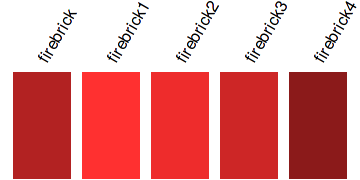

In [27]:
options(repr.plot.width=3, repr.plot.height=1.5)

par(mar=c(0,0,3,0))
cols=colors()[grep("fire", colors())]; cols
posX=barplot( rep(1, length(cols)), col=cols, ann=F, axes=F, border = NA)

text(posX, 1.1, labels=cols, 
     srt=60, adj=0, cex=0.8,
     col="black", xpd=T)

[1] "#000080" "#050582" "#0B0B85" "#111188" "#16168B" "#1C1C8E" "#222291"
 [8] "#282893" "#2D2D96" "#333399"

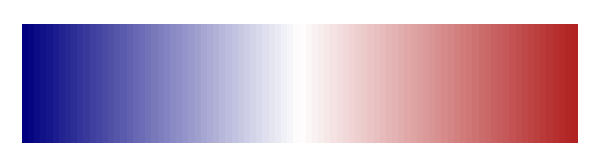

In [28]:
options(repr.plot.width=5, repr.plot.height=1.2)

n=90 #100 is good
cols=colorRampPalette(colors = c('navy','white','firebrick'), interpolate ="linear")( n )
cols[1:10]

par(mar=c(0,0,1,0))
barplot( rep(1, length(cols)), col=cols, 
        border=NA, space=0,
       ann=F, axes=F)

### 热图 color bar

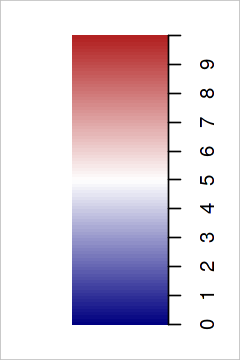

In [29]:
options(repr.plot.width=2, repr.plot.height=3)

par(mar=c(1,3,1,3))
barplot( rep(1, length(cols)), col=cols, 
        border=NA, space=0,
       ann=F, axes=F, horiz =T)

box("outer", col='grey')
axis(4, at=seq(0,length(cols), length.out = 11), 0:10)

## 值大小对应颜色: cut()函数

[1] "#7171B8" "#5252A9" "#38389C" "#292994" "#6161B0" "#9A9ACC" "#292994"
 [8] "#6161B0" "#0A0A85" "#5252A9"

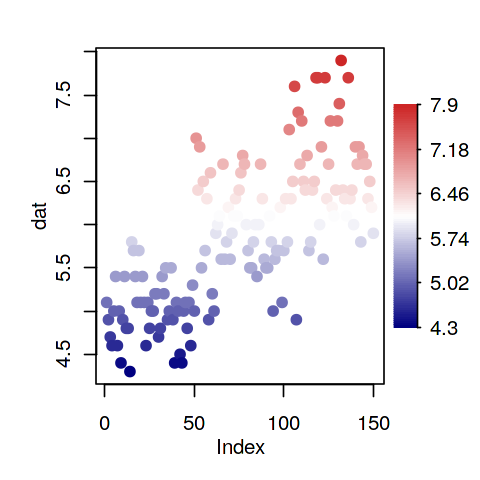

In [30]:
options(repr.plot.width=4, repr.plot.height=4)

dat=iris$Sepal.Length
colors2=colorRampPalette(colors = c('navy','white','firebrick3'), interpolate ="linear")(100 )

plotcol <- colors2[ cut( dat, breaks=100) ]; plotcol[1:10] #把数字分成100个区间的因子，每个level对应一个颜色。

# 主图
par( mar=c(4,4,2,4) )
plot(dat, col=plotcol, pch=19, mgp=c(2,1,0) )

# 画图例
par(mar=c(0,0,0,0), fig=c(0.82,0.87, 0.3,0.8), new=T )
barplot( rep(1, length(colors2)), col=colors2, 
        border=NA, space=0, horiz =T,
       ann=F, axes=F)

axis(side=4, at=seq(0,100,20), labels=seq( min(dat), max(dat), (max(dat)-min(dat))/5 ), tcl=-0.1, # 刻度长度
     #padj=-1.5, # 刻度值距离
     mgp=c(2,0.5,0),
     las=2)

# ggsci

对于所有调色板，相应的比例命名为
- scale_color_palname()
- scale_fill_palname()

可以用于 ggplot2 中。

`geom_smooth()` using formula 'y ~ x'



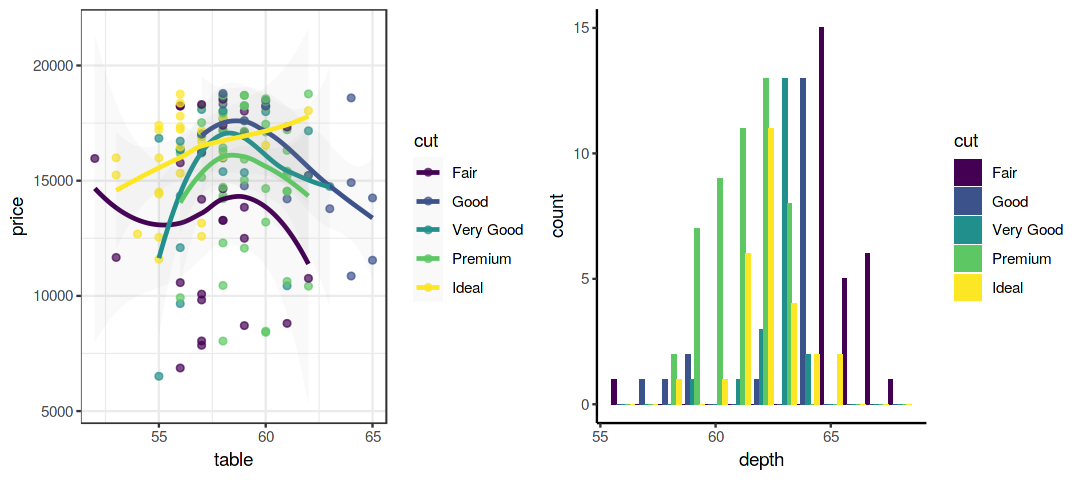

In [31]:
options(repr.plot.width=9, repr.plot.height=4)

library(ggplot2)
library('gridExtra')
library('ggsci')

p1=ggplot( subset(diamonds, carat>=2.5), aes(table, price, color=cut))+
    geom_point(alpha=0.7)+
    geom_smooth(method = "loess", alpha = 0.05, size = 1, span = 1) +
    theme_bw()
p2=ggplot( subset(diamonds, carat>=2.5 & depth>55 & depth<70 ), aes(x=depth, fill=cut))+
   geom_histogram(color=NA, binwidth=1, position="dodge")+theme_classic()

grid.arrange(p1, p2, ncol = 2)

## NPG配色

`geom_smooth()` using formula 'y ~ x'



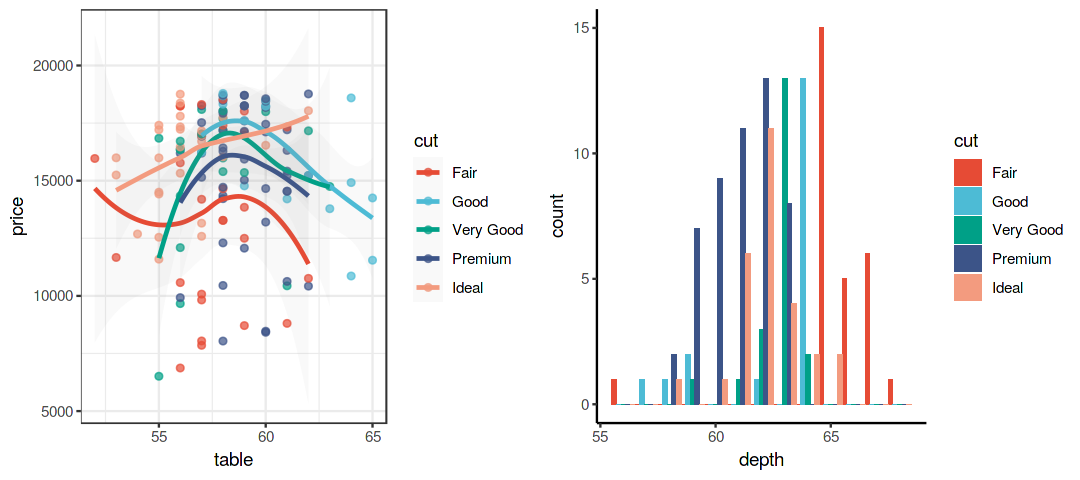

In [32]:
p1_npg <- p1 + scale_color_npg()
p2_npg <- p2 + scale_fill_npg()
grid.arrange(p1_npg, p2_npg, ncol = 2)

## AAAS配色

`geom_smooth()` using formula 'y ~ x'



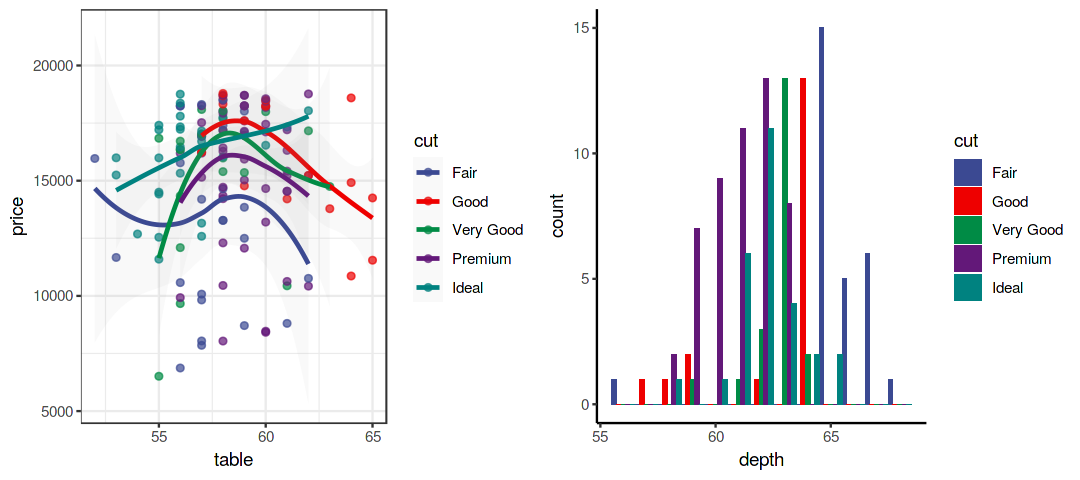

In [33]:
p1_aaas <- p1 + scale_color_aaas()
p2_aaas <- p2 + scale_fill_aaas()
grid.arrange(p1_aaas, p2_aaas, ncol = 2)

## NEJM

`geom_smooth()` using formula 'y ~ x'



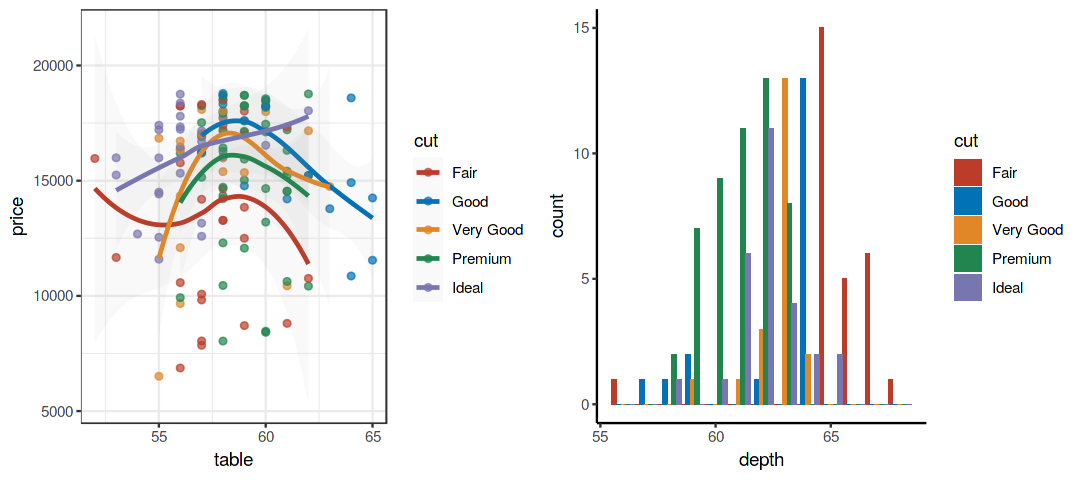

In [34]:
p1_nejm <- p1 + scale_color_nejm()
p2_nejm <- p2 + scale_fill_nejm()
grid.arrange(p1_nejm, p2_nejm, ncol = 2)

## 导出颜色

[1] "#E64B35B2" "#4DBBD5B2" "#00A087B2" "#3C5488B2" "#F39B7FB2" "#8491B4B2"
[7] "#91D1C2B2" "#DC0000B2" "#7E6148B2"

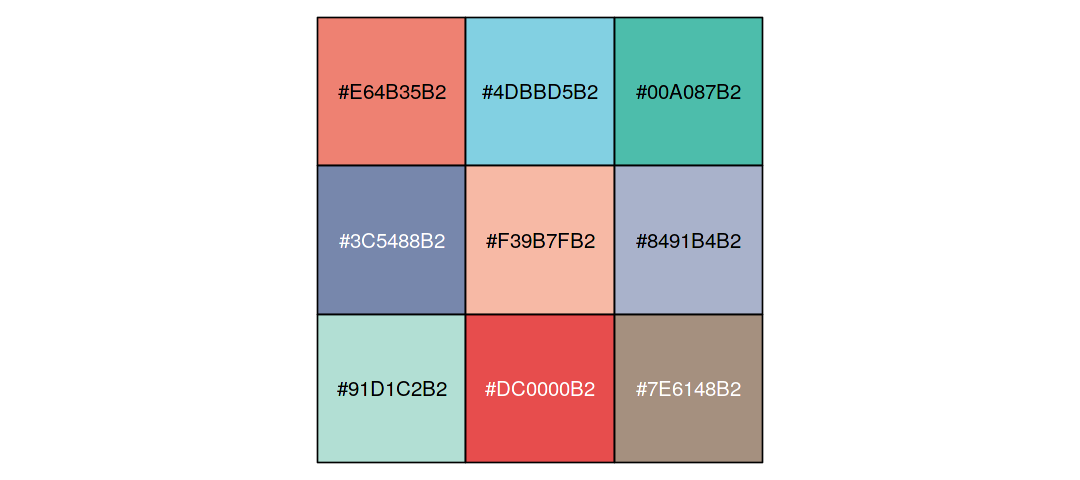

In [35]:
mypal <- pal_npg("nrc", alpha = 0.7)(9)
mypal

library("scales")
show_col(mypal)